## Load dataset

In [1]:
!pip install underthesea wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 72.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.8 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

ds = load_dataset("uitnlp/vietnamese_students_feedback")
ds = ds.remove_columns(['topic'])
ds

Generating train split:   0%|          | 0/11426 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1583 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3166 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'sentiment'],
        num_rows: 11426
    })
    validation: Dataset({
        features: ['sentence', 'sentiment'],
        num_rows: 1583
    })
    test: Dataset({
        features: ['sentence', 'sentiment'],
        num_rows: 3166
    })
})

In [3]:
sentiment_order = {
    0: 'negative',
    1: 'neutral',
    2: 'positive'
}

list(sentiment_order.keys())

[0, 1, 2]

In [4]:
df_train = ds['train'].to_pandas()
df_val = ds['validation'].to_pandas()

df_train

,sentence,sentiment
0,slide giáo trình đầy đủ .,2
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2
...,...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...,0
11422,em cảm ơn cô nhiều .,2
11423,giao bài tập quá nhiều .,0
11424,"giáo viên dạy dễ hiểu , nhiệt tình .",2


In [5]:
print(df_train.isnull().sum())
print(df_val.isnull().sum())

sentence     0
sentiment    0
dtype: int64
sentence     0
sentiment    0
dtype: int64


## Preprocessing text

In [6]:
import re
from underthesea import word_tokenize, text_normalize

def clean_text(text):
    CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

    # remove html tag
    text = re.sub(CLEANR, '', text)

    text = text.lower()
    
    # remove dấu câu
    text = re.sub(r'[^\w\s]', '', text)
    
    # remove space bị dư giữa các từ trong câu và đầu, cuối câu
    text = text.strip()
    text = re.sub(r"\s{2,}", " ", text)
    
    # replace khoảng trắng giữa các từ bằng dấu , khi có dấu , ở giữa các từ
    text = re.sub(r"\,(\S)", r", \1", text)
    
    return text

def normalize_text(text: str) -> str:
    return text_normalize(text)

def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

def clean_text_preprocessing(text: str) -> str:
    return clean_text(remove_emojis(text))


def apply_preprocessing_text(text: str) -> str:
    return normalize_text(clean_text_preprocessing(text))


df_train['sentence'] = df_train['sentence'].fillna("")
df_train['sentence'] = df_train['sentence'].apply(lambda t: apply_preprocessing_text(t))

df_val['sentence'] = df_val['sentence'].fillna("")
df_val['sentence'] = df_val['sentence'].apply(lambda t: apply_preprocessing_text(t))

df_train

,sentence,sentiment
0,slide giáo trình đầy đủ,2
1,nhiệt tình giảng dạy gần gũi với sinh viên,2
2,đi học đầy đủ full điểm chuyên cần,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...,2
...,...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...,0
11422,em cảm ơn cô nhiều,2
11423,giao bài tập quá nhiều,0
11424,giáo viên dạy dễ hiểu nhiệt tình,2


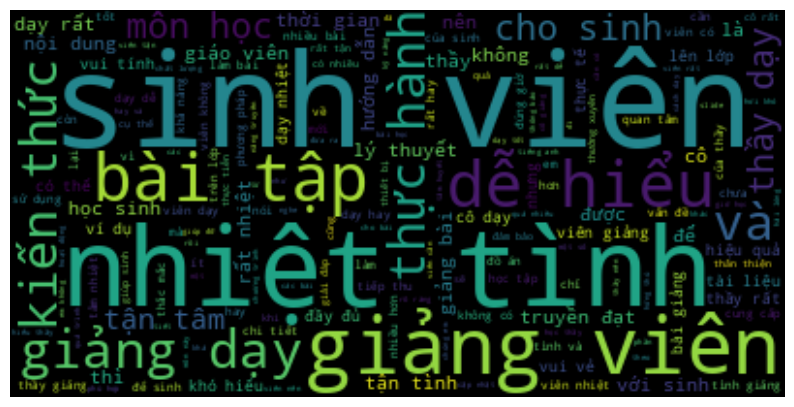

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df_train["sentence"].str.cat(sep=" ")


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

sentiment
2    5643
0    5325
1     458
Name: count, dtype: int64


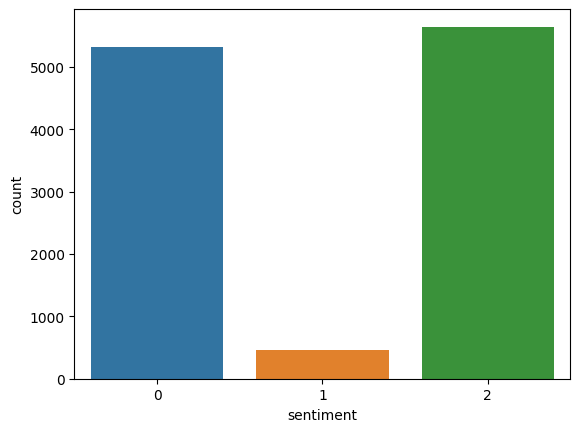

In [8]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

print(df_train['sentiment'].value_counts())

sns.countplot(data=df_train, x="sentiment", order=list(sentiment_order.keys()))
plt.show()

In [9]:
df_train_analyze = df_train.copy(deep=True)
df_train_analyze['length'] = df_train_analyze['sentence'].apply(lambda t: len(t))
df_train_analyze

,sentence,sentiment,length
0,slide giáo trình đầy đủ,2,23
1,nhiệt tình giảng dạy gần gũi với sinh viên,2,42
2,đi học đầy đủ full điểm chuyên cần,0,34
3,chưa áp dụng công nghệ thông tin và các thiết ...,0,74
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...,2,55
...,...,...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...,0,132
11422,em cảm ơn cô nhiều,2,18
11423,giao bài tập quá nhiều,0,22
11424,giáo viên dạy dễ hiểu nhiệt tình,2,32


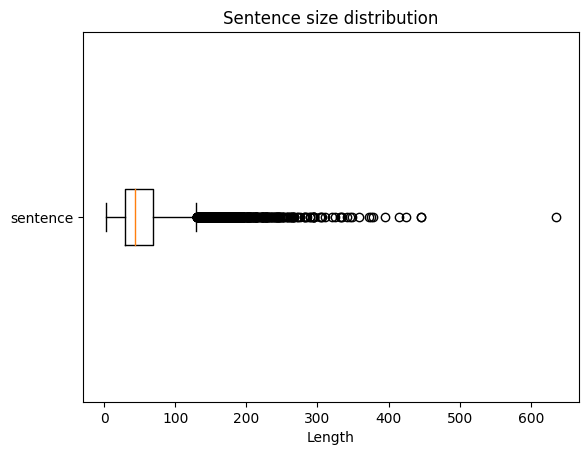

In [10]:
plt.boxplot(df_train_analyze["length"], labels=["sentence"], vert=False)
plt.title("Sentence size distribution")
plt.xlabel("Length")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


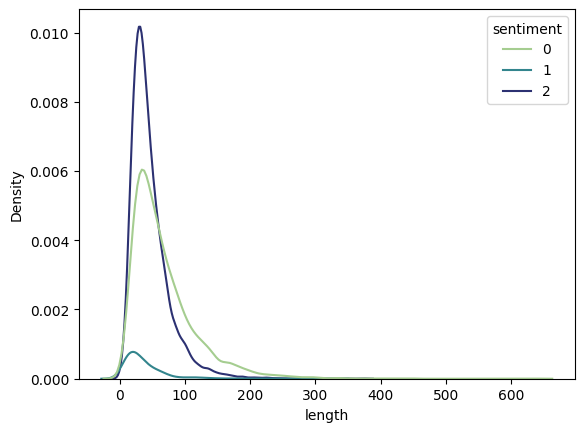

In [11]:
import seaborn as sns

sns.kdeplot(data=df_train_analyze, 
            x="length", 
            hue="sentiment", 
            palette="crest")
plt.show()

#### Apply SMOTEN over_sampling

In [12]:
from imblearn.over_sampling import SMOTEN
from imblearn.combine import SMOTETomek

sampler = SMOTEN(sampling_strategy={
    1: 1000
}, random_state=42)

sampler

SMOTEN(random_state=42, sampling_strategy={1: 1000})

In [13]:
X_train = df_train.drop('sentiment', axis=1)
y_train = df_train['sentiment']

X_train

,sentence
0,slide giáo trình đầy đủ
1,nhiệt tình giảng dạy gần gũi với sinh viên
2,đi học đầy đủ full điểm chuyên cần
3,chưa áp dụng công nghệ thông tin và các thiết ...
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...
...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...
11422,em cảm ơn cô nhiều
11423,giao bài tập quá nhiều
11424,giáo viên dạy dễ hiểu nhiệt tình


In [14]:
X_res, y_res = sampler.fit_resample(X_train, y_train)
X_res

,sentence
0,slide giáo trình đầy đủ
1,nhiệt tình giảng dạy gần gũi với sinh viên
2,đi học đầy đủ full điểm chuyên cần
3,chưa áp dụng công nghệ thông tin và các thiết ...
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...
...,...
11963,chắc là em không có gì là không hài lòng về th...
11964,chắc là em không có gì là không hài lòng về th...
11965,chắc là em không có gì là không hài lòng về th...
11966,chắc là em không có gì là không hài lòng về th...


In [15]:
import pandas as pd

df_train = pd.concat([X_res, y_res], axis=1)
df_train

,sentence,sentiment
0,slide giáo trình đầy đủ,2
1,nhiệt tình giảng dạy gần gũi với sinh viên,2
2,đi học đầy đủ full điểm chuyên cần,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...,2
...,...,...
11963,chắc là em không có gì là không hài lòng về th...,1
11964,chắc là em không có gì là không hài lòng về th...,1
11965,chắc là em không có gì là không hài lòng về th...,1
11966,chắc là em không có gì là không hài lòng về th...,1


#### Get neutral sentiment in df_train

In [16]:
df_train_neutral = df_train[df_train['sentiment'] == 1]
df_train_neutral

,sentence,sentiment
6,em sẽ nợ môn này nhưng em sẽ học lại ở các học...,1
12,đang dạy thầy wzjwz208 đi qua nước ngoài giữa ...,1
55,tạo ra sự cạnh tranh trong mỗi buổi thực hành,1
70,ôn tập đúng theo thầy nhưng không biết cuối kỳ...,1
116,bài tập trên lớp,1
...,...,...
11963,chắc là em không có gì là không hài lòng về th...,1
11964,chắc là em không có gì là không hài lòng về th...,1
11965,chắc là em không có gì là không hài lòng về th...,1
11966,chắc là em không có gì là không hài lòng về th...,1


#### Filter neutral sentiment in df_train

In [17]:
print(df_train.shape)
df_train = df_train[df_train['sentiment'] != 1]
df_train

(11968, 2)


,sentence,sentiment
0,slide giáo trình đầy đủ,2
1,nhiệt tình giảng dạy gần gũi với sinh viên,2
2,đi học đầy đủ full điểm chuyên cần,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...,2
...,...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...,0
11422,em cảm ơn cô nhiều,2
11423,giao bài tập quá nhiều,0
11424,giáo viên dạy dễ hiểu nhiệt tình,2


In [18]:
df_train_neutral.iloc[0]['sentence']

'em sẽ nợ môn này nhưng em sẽ học lại ở các học kỳ kế tiếp'

In [19]:
import json

def load_word_net_dict():
    with open('/kaggle/input/word-net-vietnamese/word_net_vi.json', mode="r") as f:
        word_net_dict = json.load(f)

    return word_net_dict

list(load_word_net_dict().keys())[5], list(load_word_net_dict().values())[5]

('ẩu',
 [' bừa',
  ' cẩu thả',
  ' bất cẩn',
  ' ào ào',
  ' vô tâm',
  ' vội vàng',
  ' thiếu thận trọng',
  ' thiểu cẩn trọng',
  ' thiếu cẩn thận',
  ' thiếu chín chắn',
  ' thiếu suy nghĩ',
  ' thiếu xem xét',
  ' không thận trọng',
  ' không cẩn trọng',
  ' không cẩn thận',
  ' không chín chắn',
  ' không suy nghĩ',
  ' không xem xét'])

In [20]:
%%time
!nvidia-smi

Sat Oct 12 02:23:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             26W /  250W |       3MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
%%time

import random
import pandas as pd
from underthesea import word_tokenize

random.seed(42)
df_train_neutral_sentences = df_train_neutral['sentence']
word_net: dict = load_word_net_dict()

def generate_random_augmentation(sentence: str, sample: int, word_net: dict) -> list:
    origin_sentence_list: list = word_tokenize(sentence)
    sentence_list = origin_sentence_list.copy()
    result = []

    for _ in range(sample):
        for idx, s in enumerate(origin_sentence_list):
            if s in word_net.keys() and len(word_net[s]) > 0:
                sentence_list[idx] = random.choice(word_net[s] + [s])

        result.append(apply_preprocessing_text(' '.join(sentence_list)))
        sentence_list = origin_sentence_list.copy()

    return result



samples = [random.choice([1,2]) for i in range(len(df_train_neutral_sentences))]
print(f"Samples: {samples}")

temp_df = pd.DataFrame()
for i, sentence in enumerate(df_train_neutral_sentences):
    temp_data_sentences = generate_random_augmentation(sentence, samples[i], word_net)
    temp_df_each_sentence = pd.DataFrame({'sentence': temp_data_sentences, 'sentiment': [1]*len(temp_data_sentences)})
    temp_df = pd.concat([temp_df, temp_df_each_sentence])

df_train_neutral = pd.concat([df_train_neutral, temp_df])

df_train_neutral

Samples: [1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 

,sentence,sentiment
6,em sẽ nợ môn này nhưng em sẽ học lại ở các học...,1
12,đang dạy thầy wzjwz208 đi qua nước ngoài giữa ...,1
55,tạo ra sự cạnh tranh trong mỗi buổi thực hành,1
70,ôn tập đúng theo thầy nhưng không biết cuối kỳ...,1
116,bài tập trên lớp,1
...,...,...
1,chứng thực là em không thể có gì là không mãn ...,1
0,bảo đảm thì em không có gì là không thể mãn ng...,1
0,đảm bảo là em không sở hữu gì là không thỏa mã...,1
0,bảo đảm là em không thể sở hữu gì thì không th...,1


In [22]:
df_train = pd.concat([df_train, df_train_neutral])
df_train

,sentence,sentiment
0,slide giáo trình đầy đủ,2
1,nhiệt tình giảng dạy gần gũi với sinh viên,2
2,đi học đầy đủ full điểm chuyên cần,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...,2
...,...,...
1,chứng thực là em không thể có gì là không mãn ...,1
0,bảo đảm thì em không có gì là không thể mãn ng...,1
0,đảm bảo là em không sở hữu gì là không thỏa mã...,1
0,bảo đảm là em không thể sở hữu gì thì không th...,1


### Plot

In [23]:
print(df_train['sentiment'].value_counts())
print(df_val['sentiment'].value_counts())

sentiment
2    5643
0    5325
1    2514
Name: count, dtype: int64
sentiment
2    805
0    705
1     73
Name: count, dtype: int64


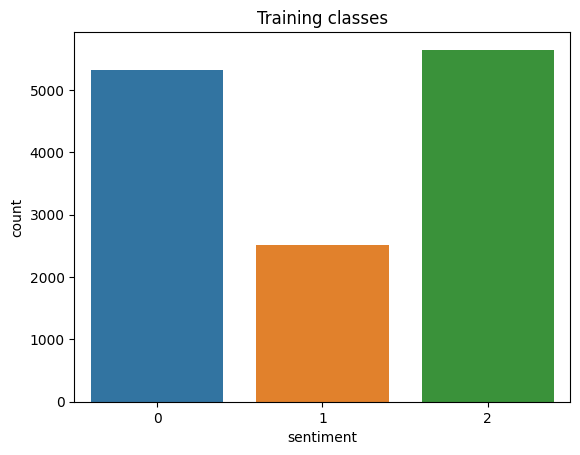

In [24]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df_train, x="sentiment", order=sorted(list(df_train['sentiment'].unique())))
plt.title("Training classes")
plt.show()

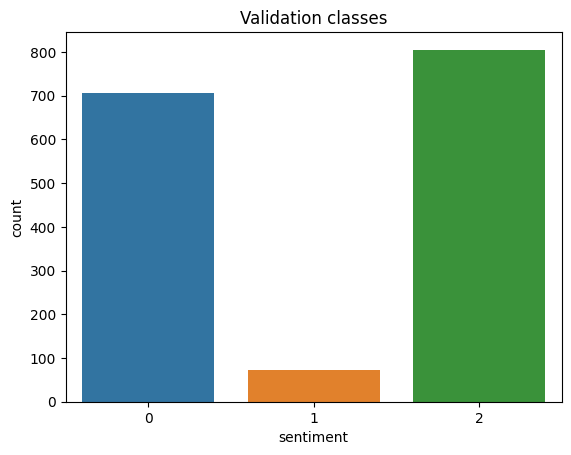

In [25]:
sns.countplot(data=df_val, x="sentiment", order=sorted(list(df_val['sentiment'].unique())))
plt.title("Validation classes")
plt.show()

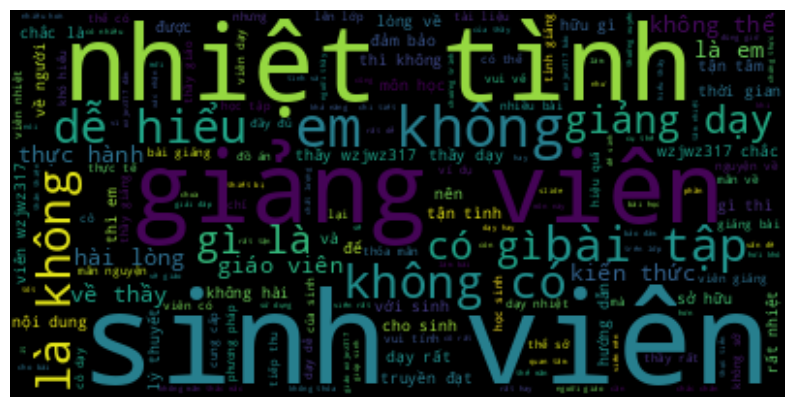

In [26]:
text = df_train["sentence"].str.cat(sep=" ")


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Load tokenizer

In [27]:
# Load model directly
from transformers import AutoTokenizer, DataCollatorWithPadding

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
from datasets import Dataset

def preprocessing(data):
    return tokenizer(data['sentence'], truncation=True, padding=True, max_length=128)

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)

train_dataset = train_dataset.map(preprocessing, batched=True)
val_dataset = val_dataset.map(preprocessing, batched=True)

train_dataset, train_dataset.shape

Map:   0%|          | 0/13482 [00:00<?, ? examples/s]

Map:   0%|          | 0/1583 [00:00<?, ? examples/s]

(Dataset({
     features: ['sentence', 'sentiment', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 13482
 }),
 (13482, 6))

In [29]:
print(train_dataset[0]['input_ids'])
print(train_dataset[30]['input_ids'])

print(tokenizer.decode(train_dataset[0]['input_ids']))
print(tokenizer.decode(train_dataset[30]['input_ids']))

[0, 48090, 4368, 1893, 545, 312, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 2151, 9901, 5415, 940, 204, 53637, 5015, 1427, 16084, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
<s> slide giáo trình đầy đủ </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<s> nội dung giảng dạy quá nhàm chán khô khan </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

In [30]:
train_dataset = train_dataset.remove_columns(["sentence"])
val_dataset = val_dataset.remove_columns(["sentence"])

train_dataset, val_dataset

(Dataset({
     features: ['sentiment', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 13482
 }),
 Dataset({
     features: ['sentiment', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 1583
 }))

In [31]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, collate_fn=data_collator)
val_dataloader = DataLoader(val_dataset, batch_size=64, collate_fn=data_collator)

train_dataloader, len(train_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x7b16bda3e920>, 211)

### View sample one batch of train_dataloader

In [32]:
for batch in train_dataloader:
    print(batch)
    print(batch.input_ids[22])
    print(tokenizer.decode(batch.input_ids[22]))
    break

{'sentiment': tensor([2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
        0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,
        2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0]), '__index_level_0__': tensor([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 66]), 'input_ids': tensor([[    0, 48090,  4368,  ...,     1,     1,     1],
        [    0,  2515,   939,  ...,     1,     1,     1],
        [    0,    57,   222,  ...,     1,     1,     1],
        ...,
        [    0,    77,  3078,  ...,     1,     1,     1],
        [    0,  1249,  1855,  ...,     1,     1,     1],
        [    0,   106,    44,  ...,     1,     1,     1]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0,

In [33]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Model init

In [34]:
import torch
from torch import nn

### Add Attention mechanism

In [35]:
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.attn = nn.Linear(hidden_size, 1, bias=False)


    def forward(self, lstm_out):
        # lstm_output = [batch size, seq_len, hidden_dim]
        attention_scores = self.attn(lstm_out)
        # attention_scores = [batch size, seq_len, 1]
        attention_scores = attention_scores.squeeze(2)
        # attention_scores = [batch size, seq_len]
        return nn.Softmax(dim=1)(attention_scores)

### Build LSTM Model

In [36]:
class LSTMModel(nn.Module):
    def __init__(self, vocal_size, embedding_dim, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.bidirectional = True
        self.hidden_size = hidden_size
        
        self.embedding = nn.Embedding(vocal_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True, bidirectional=self.bidirectional)
        self.attention = Attention(self.hidden_size*2 if self.bidirectional else self.hidden_size)
        self.dropout = nn.Dropout(p=0.3)
        self.conv1d = nn.Conv1d(in_channels=embedding_dim, out_channels=128, kernel_size=2)
        self.fc1 = nn.Linear(self.hidden_size*2, 64) # hidden_size*2 because of bidirectional = True
        self.fc2 = nn.Linear(64, 8)
        self.fc3 = nn.Linear(8, output_size)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax(dim=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)

        # because shape of embedding out is (batch_size, sequence_len, embedding_dim)
        # then, get batch_size
        batch_size = x.size(0)
        h0 = torch.zeros(2, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(2, batch_size, self.hidden_size).to(x.device)
        lstm_out, _ = self.lstm(x, (h0, c0))
        # shape: (batch_size, sequence_len, D*hidden_size)
        # D = 2 if bidirectional = True
        
        attention_weights = self.attention(lstm_out)
        # attention_weights = [batch size, seq_len]
        attention_weights = attention_weights.unsqueeze(2)
        weighted = lstm_out * attention_weights
        # weighted = [batch size, seq_len, hidden_dim]

        weighted_sum = weighted.sum(dim=1)
        # weighted_sum = [batch size, hidden_dim]


#         x = self.dropout(lstm_out[:, -1, :]) # get the last value of each sequence length
        x = self.dropout(weighted_sum) # get the last value of each sequence length
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))

        return x

In [37]:
class GRUModel(nn.Module):
    def __init__(self, vocal_size, embedding_dim, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.bidirectional = True
        self.hidden_size = hidden_size
        
        self.embedding = nn.Embedding(vocal_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_size, batch_first=True, bidirectional=self.bidirectional)
        self.attention = Attention(self.hidden_size*2 if self.bidirectional else self.hidden_size)
        self.dropout = nn.Dropout(p=0.3)
        self.conv1d = nn.Conv1d(in_channels=embedding_dim, out_channels=128, kernel_size=2)
        self.fc1 = nn.Linear(self.hidden_size*2, 64) # hidden_size*2 because of bidirectional = True
        self.fc2 = nn.Linear(64, 8)
        self.fc3 = nn.Linear(8, output_size)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax(dim=1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.embedding(x)

        # because shape of embedding out is (batch_size, sequence_len, embedding_dim)
        # then, get batch_size
        batch_size = x.size(0)
        h0 = torch.zeros(2, batch_size, self.hidden_size).to(x.device)
#         c0 = torch.zeros(2, batch_size, self.hidden_size).to(x.device)
        gru_out, _ = self.gru(x, h0)
        # shape: (batch_size, sequence_len, D*hidden_size)
        # D = 2 if bidirectional = True
        
        attention_weights = self.attention(gru_out)
        # attention_weights = [batch size, seq_len]
        attention_weights = attention_weights.unsqueeze(2)
        weighted = gru_out * attention_weights
        # weighted = [batch size, seq_len, hidden_dim]

        weighted_sum = weighted.sum(dim=1)
        # weighted_sum = [batch size, hidden_dim]


#         x = self.dropout(lstm_out[:, -1, :]) # get the last value of each sequence length
        x = self.dropout(weighted_sum) # get the last value of each sequence length
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))

        return x

### Define loss and optimizer

In [38]:
train_size = df_train.shape[0]
train_sentiment_NEG_len = df_train[df_train['sentiment'] == 0].shape[0]
train_sentiment_NEU_len = df_train[df_train['sentiment'] == 1].shape[0]
train_sentiment_POS_len = df_train[df_train['sentiment'] == 2].shape[0]

print(train_size)
print(train_sentiment_NEG_len)
print(train_sentiment_NEU_len)
print(train_sentiment_POS_len)

13482
5325
2514
5643


In [39]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y = df_train["sentiment"]
class_weight = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weight = torch.tensor(class_weight, dtype=torch.float, device=device)

class_weight

tensor([0.8439, 1.7876, 0.7964], device='cuda:0')

In [40]:
from torch.optim import lr_scheduler

vocal_size = tokenizer.vocab_size
embedding_dim = 128
hidden_size = 64
output_size = 3
num_epochs = 20
# num_epochs = 1

model = LSTMModel(vocal_size, embedding_dim, hidden_size, output_size).to(device)
# model = GRUModel(vocal_size, embedding_dim, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

## Training

In [41]:
class EarlyStopping:
    def __init__(self, patience=5):
        self.pre_loss = float("inf")
        self.patience = patience
        self.counter = 0

    def __call__(self, current_loss):
        if self.pre_loss < current_loss:
            self.counter += 1
            
            if self.counter > self.patience:
                return True
        else:
            self.pre_loss = current_loss
            self.counter = 0
            
        return False

In [42]:
def train_one_epoch(model, train_dataloader, optimizer, criterion, device):
    train_running_loss = 0.0
    train_correct_item = 0
    total_prediction = 0

    for idx, batch in enumerate(train_dataloader):
        inputs, labels = batch['input_ids'], batch['sentiment']
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = criterion(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        train_running_loss += loss.item()

        _, prediction = torch.max(outputs, 1)
        train_correct_item += (prediction == labels).sum().item()
        total_prediction += labels.size(0)

    train_loss = train_running_loss / len(train_dataloader)
    train_accuracy = train_correct_item / total_prediction

    return train_loss, train_accuracy

In [43]:
def train(model, train_dataloader, val_dataloader, device, num_epochs, criterion, optimizer):
    early_stopping = EarlyStopping(patience=5)

    train_loss_history = []
    train_accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []


    for epoch in range(num_epochs):
        model.train(True)

        train_loss, train_accuracy = train_one_epoch(model,
                                                     train_dataloader,
                                                     optimizer,
                                                     criterion,
                                                     device)


        train_loss_history.append(train_loss)
        train_accuracy_history.append(train_accuracy)

        ### Evaludate model
        val_loss, val_accuracy = evaluate(model, val_dataloader, criterion, optimizer, device)

        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        # Print epoch statistics
        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # early stopping
        if early_stopping(val_loss):
            print("Early stopping at epoch:", epoch + 1)
            break
            
#         scheduler.step()

    print("Training finish")

    train_history = {
        'loss': train_loss_history,
        'accuracy': train_accuracy_history
    }

    val_history = {
        'loss': val_loss_history,
        'accuracy': val_accuracy_history
    }

    return train_history, val_history

#### Evaluate

In [44]:
def evaluate(model, val_dataloader, criterion, optimizer, device):
    model.train(False)

    running_loss_eval = 0.0
    val_correct_item = 0
    total_prediction = 0

    with torch.no_grad():
        for idx, batch in enumerate(val_dataloader):
            inputs, labels = batch['input_ids'], batch['sentiment']
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            # Compute the loss and its gradients
            loss = criterion(outputs, labels)
            running_loss_eval += loss.item()

            _, prediction = torch.max(outputs, 1)
            val_correct_item += (prediction == labels).sum().item()
            total_prediction += labels.size(0)


    val_loss = running_loss_eval / len(val_dataloader)
    val_accuracy = val_correct_item / total_prediction

    return val_loss, val_accuracy


In [45]:
%time

train_history, val_history = train(model,
                                   train_dataloader, val_dataloader,
                                   device,
                                   num_epochs,
                                   criterion,
                                   optimizer)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
Epoch [1/20], Train Loss: 1.0187, Val Loss: 1.3924, Train Accuracy: 0.4688, Val Accuracy: 0.0461
Epoch [2/20], Train Loss: 0.9814, Val Loss: 0.8158, Train Accuracy: 0.5406, Val Accuracy: 0.7827
Epoch [3/20], Train Loss: 0.6989, Val Loss: 0.7117, Train Accuracy: 0.8573, Val Accuracy: 0.8781
Epoch [4/20], Train Loss: 0.6726, Val Loss: 0.6964, Train Accuracy: 0.8789, Val Accuracy: 0.8951
Epoch [5/20], Train Loss: 0.6605, Val Loss: 0.7282, Train Accuracy: 0.8902, Val Accuracy: 0.8459
Epoch [6/20], Train Loss: 0.6527, Val Loss: 0.7811, Train Accuracy: 0.8987, Val Accuracy: 0.7833
Epoch [7/20], Train Loss: 0.6488, Val Loss: 0.7154, Train Accuracy: 0.9014, Val Accuracy: 0.8617
Epoch [8/20], Train Loss: 0.6370, Val Loss: 0.7169, Train Accuracy: 0.9148, Val Accuracy: 0.8553
Epoch [9/20], Train Loss: 0.6310, Val Loss: 0.7152, Train Accuracy: 0.9205, Val Accuracy: 0.8522
Epoch [10/20], Train Loss: 0.6264, Val Loss: 0.6994, Train Accu

### Plot history

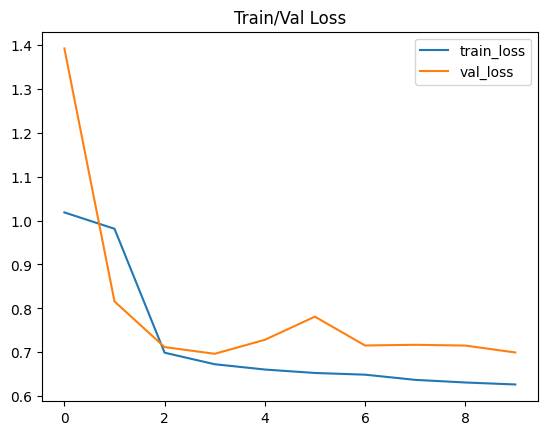

In [46]:
import matplotlib.pyplot as plt

plt.plot(train_history['loss'])
plt.plot(val_history['loss'])

plt.legend(['train_loss', 'val_loss'])
plt.title("Train/Val Loss")

plt.show()

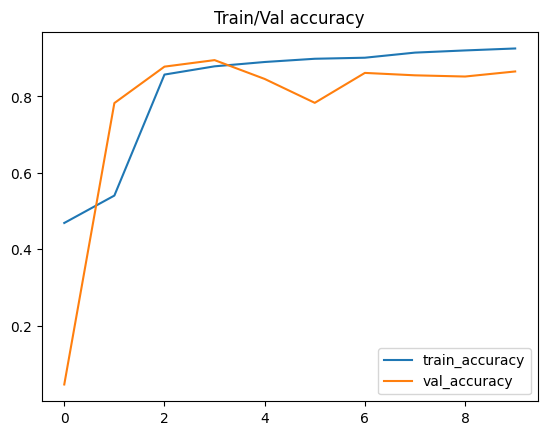

In [47]:
plt.plot(train_history['accuracy'])
plt.plot(val_history['accuracy'])

plt.legend(['train_accuracy', 'val_accuracy'])
plt.title("Train/Val accuracy")

plt.show()

## Prediction 

In [48]:
df_test = ds['test'].to_pandas()
df_test

,sentence,sentiment
0,nói tiếng anh lưu loát .,2
1,giáo viên rất vui tính .,2
2,cô max có tâm .,2
3,"giảng bài thu hút , dí dỏm .",2
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",0
...,...,...
3161,"các slide khó hiểu , ngôn ngữ trong slide phức...",0
3162,giáo viên giảng dạy có tâm huyết .,2
3163,chia sẻ cho em nhiều điều hay .,2
3164,em tiếp thu chậm .,0


In [49]:
df_test['sentence'] = df_test['sentence'].fillna("")
df_test['sentence'] = df_test['sentence'].apply(lambda t: apply_preprocessing_text(t))

df_test

,sentence,sentiment
0,nói tiếng anh lưu loát,2
1,giáo viên rất vui tính,2
2,cô max có tâm,2
3,giảng bài thu hút dí dỏm,2
4,giáo viên không giảng dạy kiến thức hướng dẫn ...,0
...,...,...
3161,các slide khó hiểu ngôn ngữ trong slide phức t...,0
3162,giáo viên giảng dạy có tâm huyết,2
3163,chia sẻ cho em nhiều điều hay,2
3164,em tiếp thu chậm,0


In [50]:
df_test['sentiment'].value_counts()

sentiment
2    1590
0    1409
1     167
Name: count, dtype: int64

In [51]:
%time

def process_apply_test(sentence):
    inputs = tokenizer(
        sentence,
        padding='max_length',  # Padding to max length
        truncation=True,
        max_length=128,        # Ensure max length matches the model requirements
        return_tensors='pt'    # Return PyTorch tensors)
    )

    # Move input tensors to device
    input_ids = inputs['input_ids'].to(device)

#     print(input_ids.dim(), input_ids.shape, input_ids)

    model.eval()

    with torch.no_grad():
        outputs = model(input_ids)

    _, predicted_class = torch.max(outputs, 1)
#     print("Predicted class:", sentiment_order[predicted_class.item()])

    return predicted_class.item()


df_test['predicted'] = df_test['sentence'].apply(lambda sentence: process_apply_test(sentence))
df_test

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


,sentence,sentiment,predicted
0,nói tiếng anh lưu loát,2,2
1,giáo viên rất vui tính,2,2
2,cô max có tâm,2,2
3,giảng bài thu hút dí dỏm,2,2
4,giáo viên không giảng dạy kiến thức hướng dẫn ...,0,0
...,...,...,...
3161,các slide khó hiểu ngôn ngữ trong slide phức t...,0,0
3162,giáo viên giảng dạy có tâm huyết,2,2
3163,chia sẻ cho em nhiều điều hay,2,2
3164,em tiếp thu chậm,0,1


In [52]:
print(df_test['sentiment'].value_counts()) 
print(df_test['predicted'].value_counts())

sentiment
2    1590
0    1409
1     167
Name: count, dtype: int64
predicted
2    1508
0    1325
1     333
Name: count, dtype: int64


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_true=df_test['sentiment'], y_pred=df_test['predicted']))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1409
           1       0.25      0.50      0.33       167
           2       0.94      0.89      0.91      1590

    accuracy                           0.85      3166
   macro avg       0.70      0.75      0.71      3166
weighted avg       0.89      0.85      0.87      3166



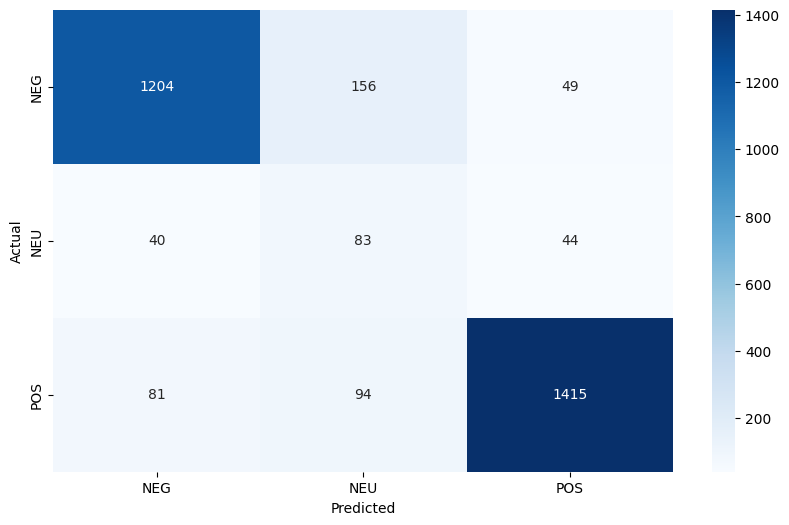

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_test['sentiment'], df_test['predicted'])

plt.figure(figsize = (10,6))
sns.heatmap(cm,
            cmap= "Blues",
            linecolor = 'black',
            annot = True, 
            fmt='',
            xticklabels = ['NEG', 'NEU', 'POS'],
            yticklabels = ['NEG', 'NEU', 'POS'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Predict with random sentence

In [55]:
sentence = "Em thấy thầy dạy được..."
sentence = apply_preprocessing_text(sentence)
print(sentence)

em thấy thầy dạy được


In [56]:
inputs = tokenizer(
    sentence,
    padding='max_length',  # Padding to max length
    truncation=True,
    max_length=128,        # Ensure max length matches the model requirements
    return_tensors='pt'    # Return PyTorch tensors)
)

input_ids = inputs['input_ids'].to(device)

In [57]:
model.eval()

LSTMModel(
  (embedding): Embedding(64000, 128)
  (lstm): LSTM(128, 64, batch_first=True, bidirectional=True)
  (attention): Attention(
    (attn): Linear(in_features=128, out_features=1, bias=False)
  )
  (dropout): Dropout(p=0.3, inplace=False)
  (conv1d): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (softmax): Softmax(dim=1)
  (sigmoid): Sigmoid()
)

In [58]:
with torch.no_grad():
    outputs = model(input_ids)

    print(outputs)

_, predicted_class = torch.max(outputs, dim=1)

predicted_class.item()

tensor([[0.0014, 0.0128, 0.9859]], device='cuda:0')


2

### Calculate with Softmax function

In [59]:
import torch
softmax = torch.nn.Softmax()
softmax_tensor = softmax(outputs)

softmax_tensor, softmax_tensor.shape

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


(tensor([[0.2133, 0.2158, 0.5709]], device='cuda:0'), torch.Size([1, 3]))

In [60]:
value, pred = torch.max(softmax_tensor, 1)
value, pred, pred.item()

(tensor([0.5709], device='cuda:0'), tensor([2], device='cuda:0'), 2)

##  Machine Learning algorithm

In [61]:
df_train

,sentence,sentiment
0,slide giáo trình đầy đủ,2
1,nhiệt tình giảng dạy gần gũi với sinh viên,2
2,đi học đầy đủ full điểm chuyên cần,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...,2
...,...,...
1,chứng thực là em không thể có gì là không mãn ...,1
0,bảo đảm thì em không có gì là không thể mãn ng...,1
0,đảm bảo là em không sở hữu gì là không thỏa mã...,1
0,bảo đảm là em không thể sở hữu gì thì không th...,1


In [62]:
X_train = df_train.drop('sentiment', axis=1)
y_train = df_train['sentiment']

X_train

,sentence
0,slide giáo trình đầy đủ
1,nhiệt tình giảng dạy gần gũi với sinh viên
2,đi học đầy đủ full điểm chuyên cần
3,chưa áp dụng công nghệ thông tin và các thiết ...
4,thầy giảng bài hay có nhiều bài tập ví dụ ngay...
...,...
1,chứng thực là em không thể có gì là không mãn ...
0,bảo đảm thì em không có gì là không thể mãn ng...
0,đảm bảo là em không sở hữu gì là không thỏa mã...
0,bảo đảm là em không thể sở hữu gì thì không th...


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer(ngram_range=(1,2))

vectorizer

TfidfVectorizer(ngram_range=(1, 2))

In [64]:
from sklearn.compose import ColumnTransformer

sentence_preprocessing = Pipeline(steps=[
    ('tfidf_calculation', vectorizer)
])

preprocessor = ColumnTransformer(transformers=[
    ("sentence_preprocessing", sentence_preprocessing, "sentence")
])

res = preprocessor.fit_transform(X_train)
res.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=150, criterion="gini"))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sentence_preprocessing',
                                                  Pipeline(steps=[('tfidf_calculation',
                                                                   TfidfVectorizer(ngram_range=(1,
                                                                                                2)))]),
                                                  'sentence')])),
                ('model', RandomForestClassifier(n_estimators=150))])

In [67]:
df_test = ds['test'].to_pandas()
df_test

,sentence,sentiment
0,nói tiếng anh lưu loát .,2
1,giáo viên rất vui tính .,2
2,cô max có tâm .,2
3,"giảng bài thu hút , dí dỏm .",2
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",0
...,...,...
3161,"các slide khó hiểu , ngôn ngữ trong slide phức...",0
3162,giáo viên giảng dạy có tâm huyết .,2
3163,chia sẻ cho em nhiều điều hay .,2
3164,em tiếp thu chậm .,0


In [68]:
df_test['sentence'] = df_test['sentence'].fillna("")
df_test['sentence'] = df_test['sentence'].apply(lambda t: apply_preprocessing_text(t))

df_test

,sentence,sentiment
0,nói tiếng anh lưu loát,2
1,giáo viên rất vui tính,2
2,cô max có tâm,2
3,giảng bài thu hút dí dỏm,2
4,giáo viên không giảng dạy kiến thức hướng dẫn ...,0
...,...,...
3161,các slide khó hiểu ngôn ngữ trong slide phức t...,0
3162,giáo viên giảng dạy có tâm huyết,2
3163,chia sẻ cho em nhiều điều hay,2
3164,em tiếp thu chậm,0


In [69]:
X_test = df_test.drop('sentiment', axis=1)
y_test = df_test['sentiment']

X_test

,sentence
0,nói tiếng anh lưu loát
1,giáo viên rất vui tính
2,cô max có tâm
3,giảng bài thu hút dí dỏm
4,giáo viên không giảng dạy kiến thức hướng dẫn ...
...,...
3161,các slide khó hiểu ngôn ngữ trong slide phức t...
3162,giáo viên giảng dạy có tâm huyết
3163,chia sẻ cho em nhiều điều hay
3164,em tiếp thu chậm


In [70]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred

array([2, 2, 2, ..., 2, 1, 0])

In [71]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1409
           1       0.59      0.22      0.32       167
           2       0.91      0.88      0.89      1590

    accuracy                           0.86      3166
   macro avg       0.78      0.68      0.70      3166
weighted avg       0.86      0.86      0.86      3166



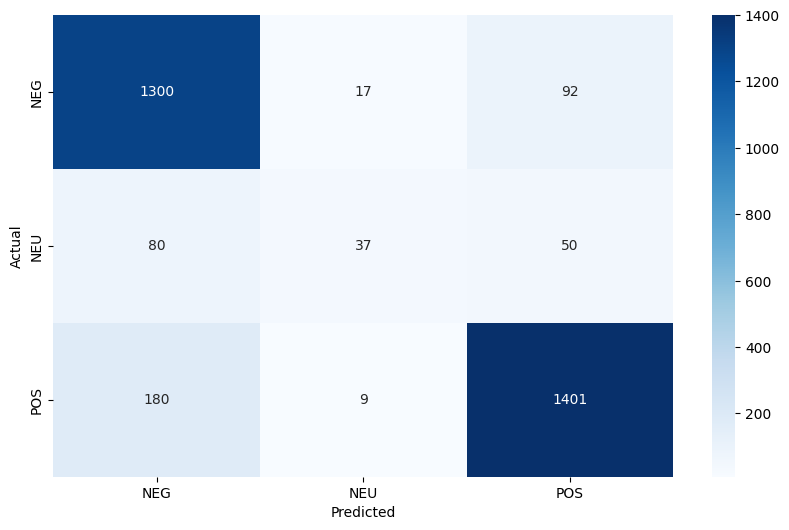

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,6))
sns.heatmap(cm,
            cmap= "Blues",
            linecolor = 'black',
            annot = True, 
            fmt='',
            xticklabels = ['NEG', 'NEU', 'POS'],
            yticklabels = ['NEG', 'NEU', 'POS'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
y_pred_proba

array([0.40666667, 0.00666667, 0.07333333, ..., 0.24      , 0.44222222,
       0.02666667])